fetched
[0 1]
Digit 0 appears  6903 times
Digit 1 appears  7877 times
Digit 2 appears  0 times
Digit 3 appears  0 times
Digit 4 appears  0 times
Digit 5 appears  0 times
Digit 6 appears  0 times
Digit 7 appears  0 times
Digit 8 appears  0 times
Digit 9 appears  0 times
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 14780 samples in 0.026s...
[t-SNE] Computed neighbors for 14780 samples in 59.118s...
[t-SNE] Computed conditional probabilities for sample 1000 / 14780
[t-SNE] Computed conditional probabilities for sample 2000 / 14780
[t-SNE] Computed conditional probabilities for sample 3000 / 14780
[t-SNE] Computed conditional probabilities for sample 4000 / 14780
[t-SNE] Computed conditional probabilities for sample 5000 / 14780
[t-SNE] Computed conditional probabilities for sample 6000 / 14780
[t-SNE] Computed conditional probabilities for sample 7000 / 14780
[t-SNE] Computed conditional probabilities for sample 8000 / 14780
[t-SNE] Computed conditional probabilities for sam

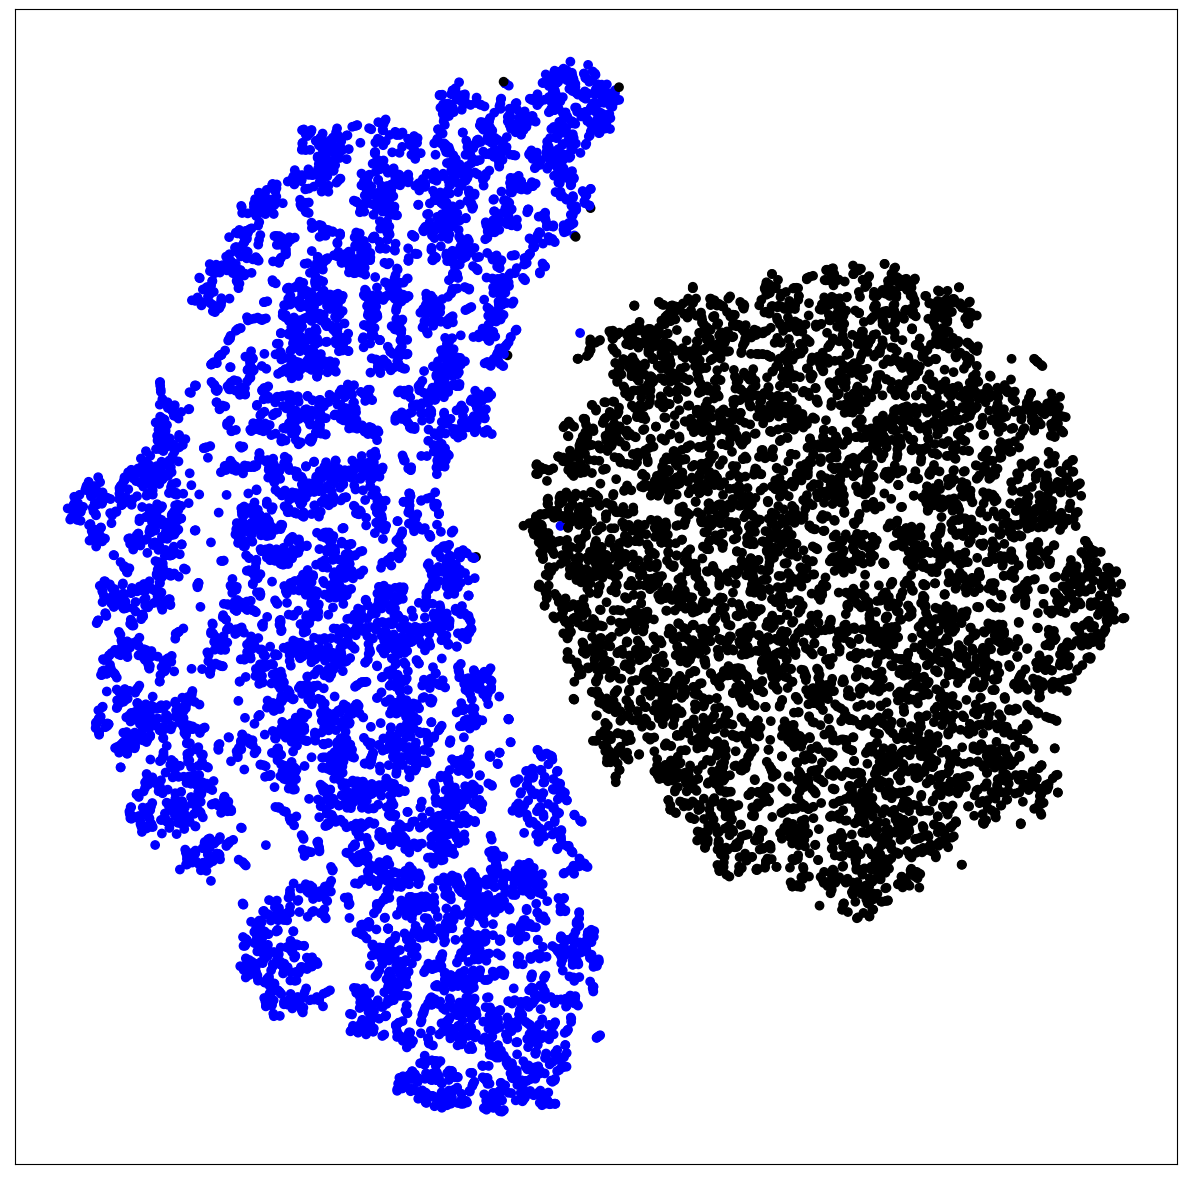

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
from sklearn.manifold import TSNE
from sklearn.datasets import fetch_openml
from sklearn.utils import shuffle
from matplotlib.patches import Patch
import matplotlib.colors as mcolors

# use all digits
perplexity_value = 30
# mnist = fetch_mldata("MNIST original")
mnist = fetch_openml("mnist_784", version=1, as_frame=False, parser="liac-arff")
print("fetched")
mytargets = list(range(0, 10))
# mytargets = [3, 8]
X_train, y_train = mnist.data / 255.0, mnist.target
y_train = y_train.astype(int)

mask = (y_train == 0) | (y_train == 1)
X_0 = np.array(X_train[mask])
y_0 = np.array(y_train[mask])

# for i, label in enumerate(y_train):
#     if label in mytargets:
#         X_train.append(X_train[i])
#         y_train.append(y_train[i])
num_samples_to_plot = 5000
X_train, y_train = shuffle(X_train, y_train)
X_train, y_train = (
    X_train[:num_samples_to_plot],
    y_train[:num_samples_to_plot],
)  # lets subsample a bit for a first impression

X_train_array = np.array(X_train)
X_train_array = np.array(X_0)
y_train = np.array(y_0)

print(np.unique(y_train))
colors = [
    "black",  # Black
    "blue",  # Blue
    "green",  # Green
    "red",  # Red
    "purple",  # Purple
    "orange",  # Orange
    "cyan",  # Cyan
    "magenta",  # Magenta
    "yellow",  # Yellow
    "brown",  # Brown
]

for digit in mytargets:
    instances = [i for i in y_train if i == digit]
    print("Digit", digit, "appears ", len(instances), "times")
if perplexity_value >= len(X_train_array):
    raise ValueError("Perplexity must be less than the number of samples.")

transformer = TSNE(n_components=2, perplexity=perplexity_value, verbose=2)
fig, plot = plt.subplots()
fig.set_size_inches(15, 15)
plt.prism()

X_transformed = transformer.fit_transform(X_train_array)
plot.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    c=[colors[label] for label in y_train],
)
plot.set_xticks(())
plot.set_yticks(())

legends = []
for label in np.unique(y_train):
    color = colors[label]
    patch = Patch(color=color, label=label)
    legends.append(patch)



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


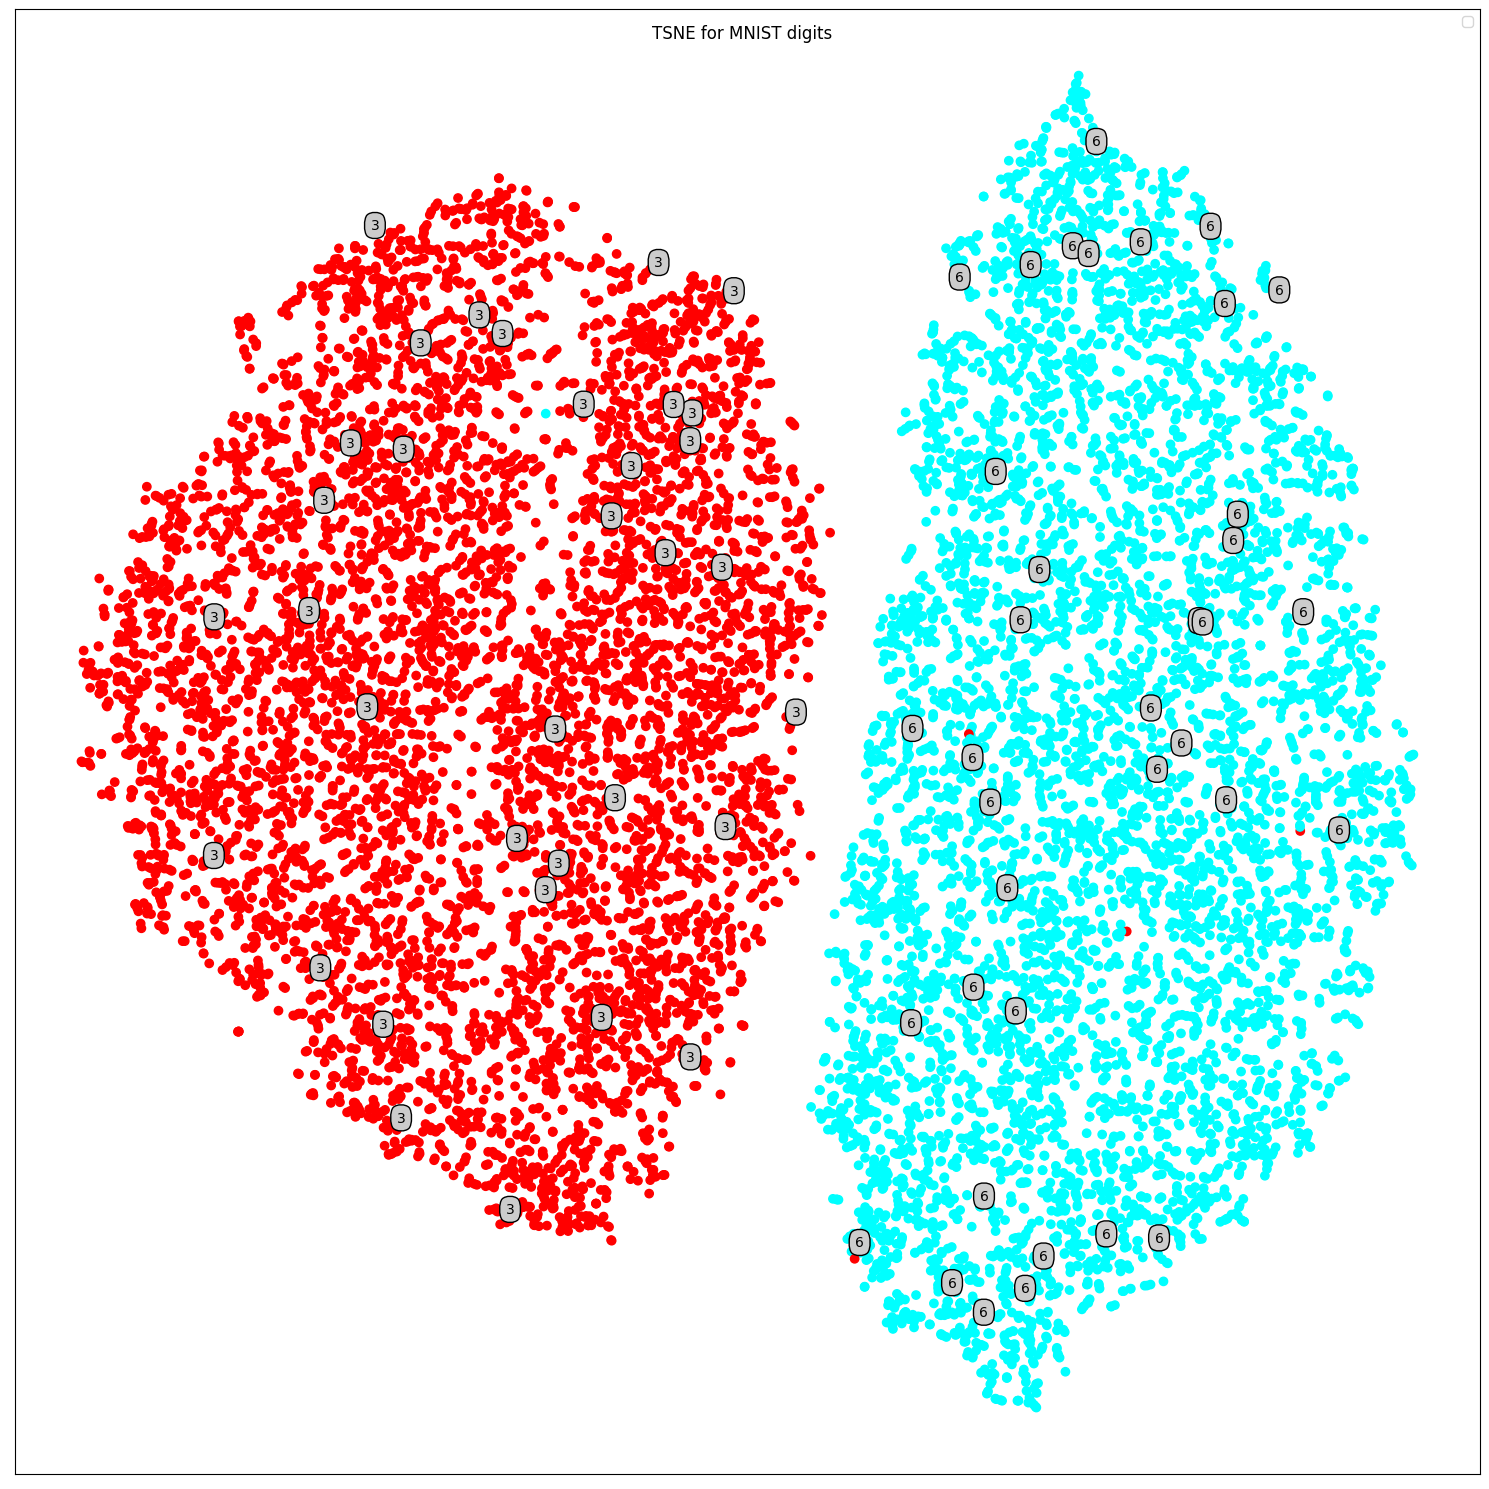

In [3]:

fig, plot = plt.subplots()
fig.set_size_inches(15, 15)
plt.prism()
plot.scatter(
    X_transformed[:, 0],
    X_transformed[:, 1],
    c=[colors[label] for label in y_train],
)
plot.set_xticks(())
plot.set_yticks(())
plot.legend(handles=legends, loc="upper right")

count = 0
plt.tight_layout()
plt.suptitle("TSNE for MNIST digits ")
for label, x, y in zip(y_train, X_transformed[:, 0], X_transformed[:, 1]):
    # Lets annotate every 1 out of 200 samples, otherwise graph will be cluttered with anotations
    if count % 200 == 0:
        plt.annotate(
            str(int(label)),
            xy=(x, y),
            color="black",
            weight="normal",
            size=10,
            bbox=dict(boxstyle="round4,pad=.5", fc="0.8"),
        )
    count = count + 1
plt.legend()
# plt.savefig("mnist_pca.png")
plt.show()